# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm, ttest_ind
from scipy.stats import percentileofscore
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [11]:
medical.shape

(1338, 8)

In [12]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

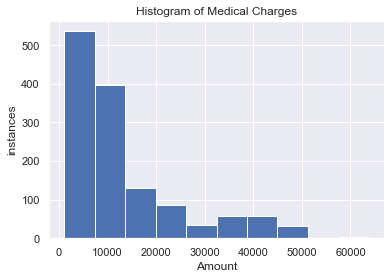

In [13]:
sns.set()
medical['charges'].hist()
plt.title('Histogram of Medical Charges')
plt.xlabel('Amount')
plt.ylabel('instances')
plt.show()

In [14]:
med_mean = np.mean(medical.charges)
print("Mean: ", med_mean)
med_std = np.std(medical.charges, ddof = 1) # estimate population standard deviation
print("Estimated Population Standard Deviation: ", med_std)

Mean:  13270.422265141257
Estimated Population Standard Deviation:  12110.011236694001


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

I can jsutify that this data allows me to answer the question because the sample is a random sample and quite large, thus should be a representative sample of charges across the hospital. Here, the population parameters are not known and thus we can use bootstrapping to get a sense of what the 95% confidence interval for the average charge could be, and we could also create a confidence interval for the sample means.

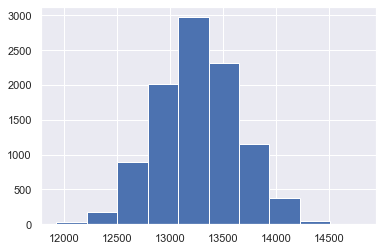

The bootstrapped confidence Interval for the average is:  12529.430892959 14018.893669582225


In [15]:
# bootstrapping

seed(47)
bs_sample_means = pd.DataFrame({'means': [medical.sample(1000, replace = True).charges.mean() for i in range(10000)]})

plt.hist(bs_sample_means)
plt.show()

print('The bootstrapped confidence Interval for the average is: ',bs_sample_means.means.quantile(.025), bs_sample_means.means.quantile(.975))


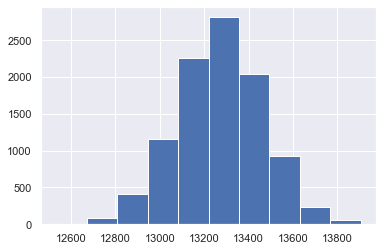

The bootstrapped confidence Interval for the average is:  12883.330637017274 13647.8851896165


In [16]:
# bootstrapping

seed(47)
bs_sample_means = pd.DataFrame({'means': [medical.sample(1000, replace = False).charges.mean() for i in range(10000)]})

plt.hist(bs_sample_means)
plt.show()

print('The bootstrapped confidence Interval for the average is: ',bs_sample_means.means.quantile(.025), bs_sample_means.means.quantile(.975))

**The above 95% confidence interval does not contain values less than 12,000 and hence shows that it is unlikely the average charge fell below 12,000.**

In [8]:
# creating a confidence interval for the mean using standard error and CLT
# use t statistic to reflect the greater uncertainty that stems from using the estimated population parameter

print('The sample mean is: ',med_mean)
print('')
print('The sample standard deviation is: ', med_std)
print('')

standard_error = med_std/np.sqrt(len(medical.charges))
margin_of_error = t.ppf(.975, df = len(medical.charges)-1)*med_std/np.sqrt(len(medical.charges))
print('The margin of error is: ', margin_of_error)
print("")

# create interval with z for large sample size
print('The 95% confidence interval for the mean is: ',med_mean - margin_of_error, med_mean + margin_of_error)



The sample mean is:  13270.422265141257

The sample standard deviation is:  12110.011236694001

The margin of error is:  649.4682309486122

The 95% confidence interval for the mean is:  12620.954034192644 13919.890496089869


**The above 95% confidence interval for the mean does not contain values less than 12,000 and hence shows that it is unlikely the average charge fell below 12,000 as well.**

In [9]:
# set up the understanding using Ho
# Null Hypothesis (Ho): Mu >= 12,000
# Alternative Hypothesis (Ha): Mu < 12,000

percentileofscore(bs_sample_means,12000) # here is the p-value

percentileofscore(bs_sample_means,16000)


100.0

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Given the nature of the administrator's concern, a one-sided interval is appropriate here because we only care whether the value is less than 12,000.

In [97]:
margin_of_error_os = t.ppf(.95, df = len(medical.charges)-1)*med_std/np.sqrt(len(medical.charges))
print('The one-sided 95% confidence interval is: ', (med_mean - margin_of_error_os, np.inf))

The one-sided 95% confidence interval is:  (12725.48718381623, inf)


In [103]:
print('The critical value is: ', (12000 - med_mean) / standard_error)
print('The critical value is less than the t-value for 95% which is: ',t.ppf(.05,df = len(medical.charges)-1))

The critical value is:  -3.8373517196585323
The critical value is less than the t-value for 95% which is:  -1.6459941145571324


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

The assumption we make about the variances is that they are roughly equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [129]:
# t-test manual set up

insurance = medical.query('insuranceclaim == 1')
no_insurance = medical.query('insuranceclaim == 0')

n1 = len(insurance.charges)
n2 = len(no_insurance.charges)

s1 = np.std(insurance.charges, ddof = 1)
s2 = np.std(no_insurance.charges, ddof = 1)

xbar1 = np.mean(insurance.charges)
print(xbar1)
print(xbar2)
xbar2 = np.mean(no_insurance.charges)

sp  = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2))
print(sp)
t_stat = (xbar1 - xbar2) / (sp*np.sqrt((1/n1)+(1/n2)))
print(t_stat)

df = n1+n2-2
print(df)

t_critical = t.ppf(.975,df = df)
print(t_critical)

16423.928276537677
8821.421892306305
11520.034268775262
11.89329903087671
1336
1.9617412190546957


In [138]:
# two sided test

# Ho: mu1 - mu2 = 0 (mu1 = mu2)
# Ha: mu1-mu2 != 0 (mu1 != mu2)

if np.abs(t_stat) > t_critical:
    print('Reject Ho')
else:
    print('Fail to Reject Ho')
    
print('The p-value is: ', t.cdf(-t_stat, df = df))

Reject Ho
The p-value is:  2.230615115810486e-31


In [121]:
# test with scipy.stats package
ttest_ind(insurance.charges,no_insurance.charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

statsmodels.stats.weightstats.ztest

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test